In [1]:
import pandas as pd
import geopandas as gpd
import pybdshadow
#Read building data
buildings = gpd.read_file(r'bd_demo_2.json')
buildings.head(5)

,Id,Floor,height,x,y,geometry
0,0,2,6.0,120.597313,31.309152,"POLYGON ((120.59739 31.30921, 120.59740 31.309..."
1,0,2,6.0,120.597276,31.309312,"POLYGON ((120.59737 31.30938, 120.59738 31.309..."
2,0,2,6.0,120.597313,31.308982,"POLYGON ((120.59741 31.30905, 120.59742 31.308..."
3,0,2,6.0,120.597272,31.309489,"POLYGON ((120.59735 31.30955, 120.59736 31.309..."
4,0,2,6.0,120.597128,31.309778,"POLYGON ((120.59729 31.30986, 120.59730 31.309..."


<AxesSubplot: >

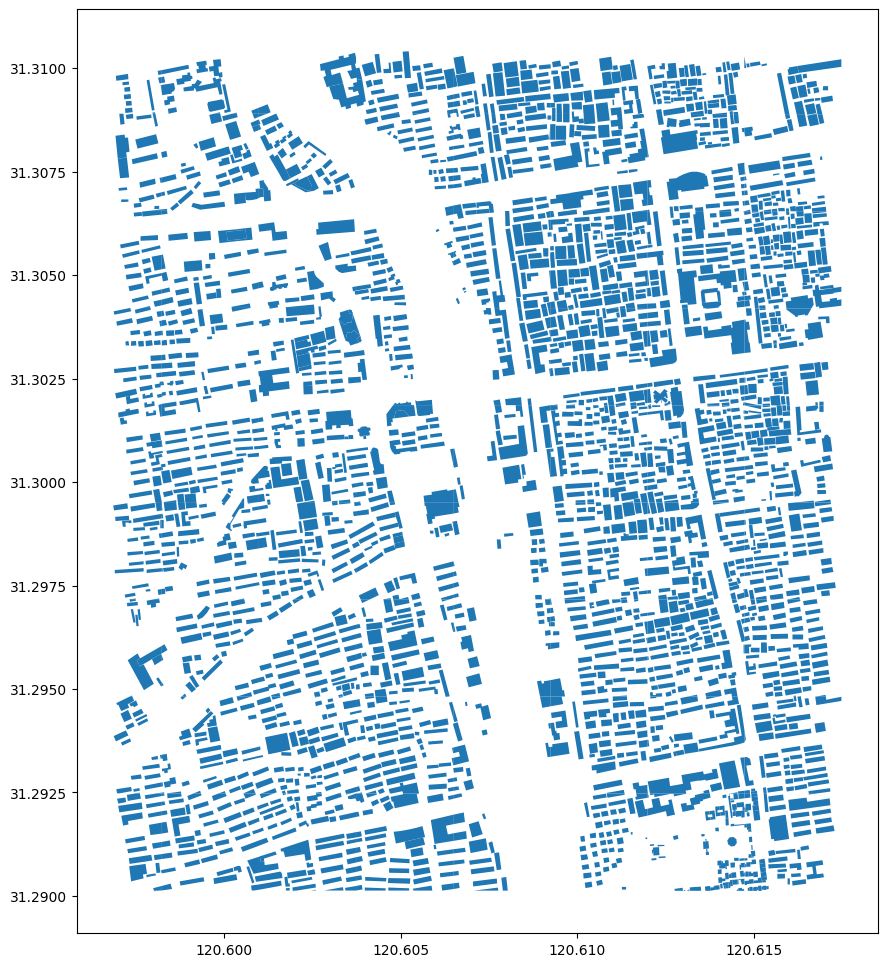

In [2]:
#Plot the buildings
buildings.plot(figsize=(12,12))

In [3]:
buildings = pybdshadow.bd_preprocess(buildings)
buildings.head(5)

/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


,geometry,Id,Floor,height,x,y,building_id
0,"POLYGON ((120.60496 31.29717, 120.60521 31.297...",0,2,6.0,120.604951,31.297207,0
1,"POLYGON ((120.60494 31.29728, 120.60496 31.297...",0,2,6.0,120.604951,31.297207,1
0,"POLYGON ((120.59739 31.30921, 120.59740 31.309...",0,2,6.0,120.597313,31.309152,2
1,"POLYGON ((120.59737 31.30938, 120.59738 31.309...",0,2,6.0,120.597276,31.309312,3
2,"POLYGON ((120.59741 31.30905, 120.59742 31.308...",0,2,6.0,120.597313,31.308982,4


In [4]:
#Given UTC time
date = pd.to_datetime('2022-01-01 12:45:33.959797119')\
    .tz_localize('Asia/Shanghai')\
    .tz_convert('UTC')
#Calculate shadows
shadows = pybdshadow.bdshadow_sunlight(buildings,date,roof=True,include_building = False)
shadows

/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/root/.pyenv/version

,height,building_id,geometry,type
0,6.0,186,"POLYGON ((120.60080 31.30858, 120.60080 31.308...",roof
1,6.0,524,POLYGON EMPTY,roof
2,6.0,1009,"POLYGON ((120.60394 31.30111, 120.60394 31.301...",roof
3,6.0,2229,"MULTIPOLYGON (((120.61384 31.29957, 120.61384 ...",roof
4,6.0,2297,"POLYGON ((120.61328 31.29770, 120.61330 31.297...",roof
...,...,...,...,...
3072,0.0,3072,"POLYGON ((120.61484 31.29058, 120.61484 31.290...",ground
3073,0.0,3073,"POLYGON ((120.61532 31.29039, 120.61532 31.290...",ground
3074,0.0,3074,"MULTIPOLYGON (((120.61499 31.29096, 120.61499 ...",ground
3075,0.0,3075,"POLYGON ((120.61472 31.29091, 120.61472 31.290...",ground


In [5]:
import networkx as nx
nx.__version__

'2.8.8'

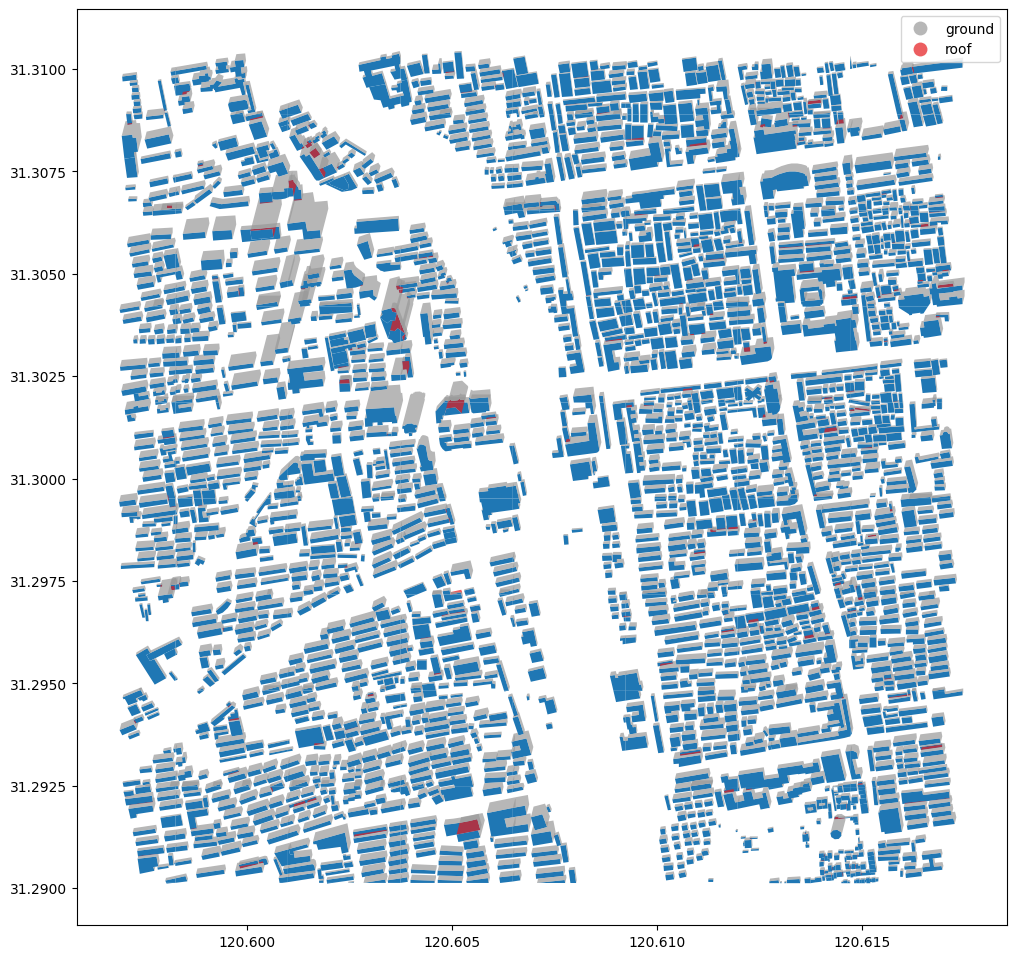

In [6]:
# Visualize buildings and shadows using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1, (12, 12))
ax = plt.subplot(111)

# plot buildings
buildings.plot(ax=ax)

# plot shadows
shadows.plot(ax=ax, alpha=0.7,
             column='type',
             categorical=True,
             cmap='Set1_r',
             legend=True)

plt.show()

In [7]:
#Visualize using keplergl
pybdshadow.show_bdshadow(buildings = buildings,shadows = shadows)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'lz48o3', 'type': '…

In [8]:
# Shadow generated by Point light
#Define the position and the height of the point light
pointlon,pointlat,pointheight = [120.60820619503946,31.300141884245672,100]
#Calculate building shadow for point light
shadows = pybdshadow.bdshadow_pointlight(buildings,pointlon,pointlat,pointheight)
#Visualize buildings and shadows
pybdshadow.show_bdshadow(buildings = buildings,shadows = shadows)


/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'lz48o3', 'type': '…

/tmp/ipykernel_31665/3491302112.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['x'] = buildings.centroid.x
/tmp/ipykernel_31665/3491302112.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['y'] = buildings.centroid.y


<AxesSubplot: >

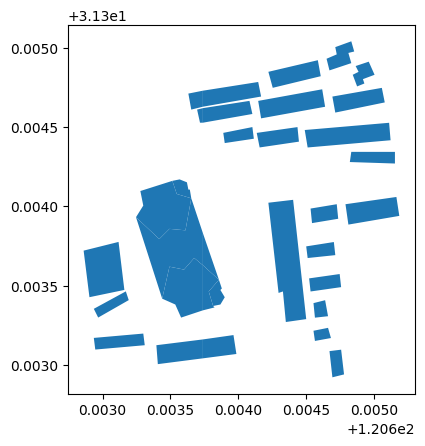

In [9]:
#Shadow coverage analysis
#define analysis area
bounds = [120.603,31.303,120.605,31.305]
#filter the buildings
buildings['x'] = buildings.centroid.x
buildings['y'] = buildings.centroid.y
buildings_analysis = buildings[(buildings['x'] > bounds[0]) &
                      (buildings['x'] <  bounds[2]) &
                      (buildings['y'] >  bounds[1]) &
                      (buildings['y'] <  bounds[3])]
buildings_analysis.plot()



In [10]:
#calculate sunshine time on the building roof
sunshine = pybdshadow.cal_sunshine(buildings_analysis,
                                   day='2022-01-01',
                                   roof=True,
                                   accuracy=1, #Set the accuracy  as number, it will generate grids as anlysis unit
                                   precision=900)


/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/pybdshadow/preprocess.py:87: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of wh

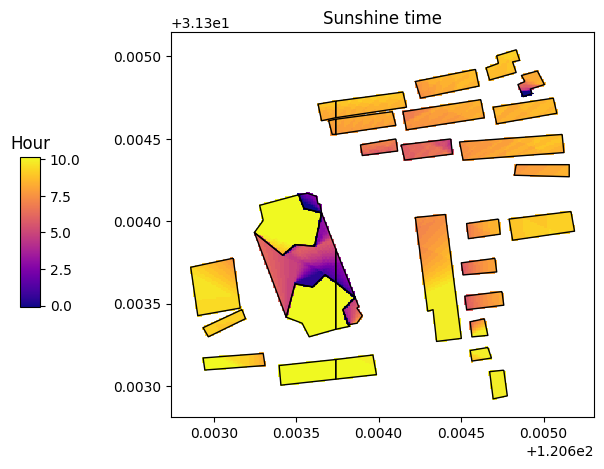

In [11]:
#Visualize buildings and sunshine time using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)
#define colorbar
cax = plt.axes([0.15, 0.33, 0.02, 0.3])
plt.title('Hour')
#plot the sunshine time
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)
#Buildings
buildings_analysis.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))
plt.sca(ax)
plt.title('Sunshine time')
plt.show()

In [12]:
#calculate sunshine time on the ground (set the roof to False)
sunshine = pybdshadow.cal_sunshine(buildings_analysis,
                                   day='2022-01-01',
                                   roof=False,
                                   accuracy=1,
                                   precision=900)


/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/pybdshadow/preprocess.py:87: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  gdfb = gpd.sjoin(gdfb,gdfa).groupby([col])['geometry'].apply(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/pybdshadow/preprocess.py:87: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and sile

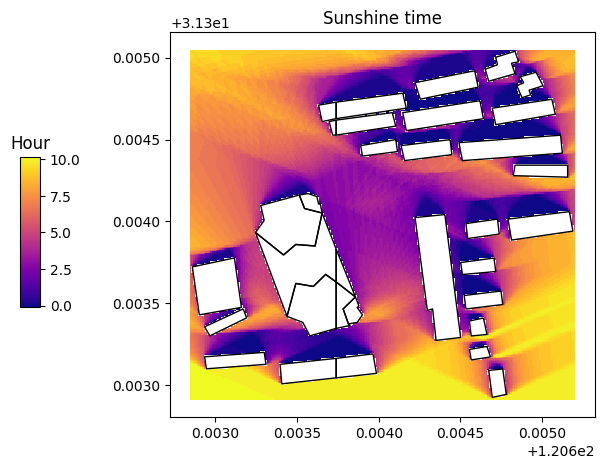

In [13]:
#Visualize buildings and sunshine time using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)
#define colorbar
cax = plt.axes([0.15, 0.33, 0.02, 0.3])
plt.title('Hour')
#plot the sunshine time
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)
#Buildings
buildings_analysis.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))
plt.sca(ax)
plt.title('Sunshine time')
plt.show()

/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/pybdshadow/preprocess.py:87: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  gdfb = gpd.sjoin(gdfb,gdfa).groupby([col])['geometry'].apply(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/pybdshadow/preprocess.py:87: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and sile

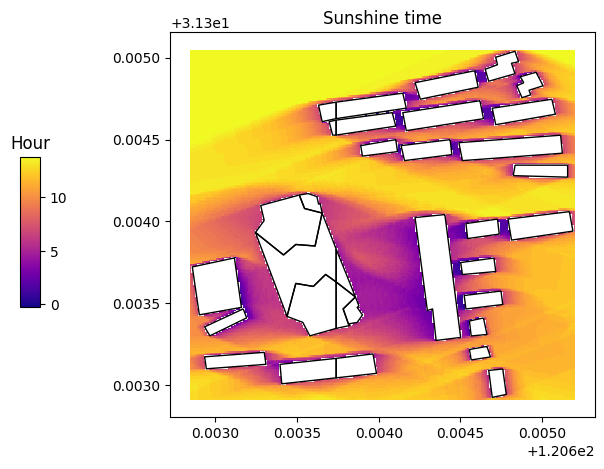

In [14]:
#calculate sunshine time on the ground (set the roof to False)
sunshine = pybdshadow.cal_sunshine(buildings_analysis,
                                   day='2022-07-15',
                                   roof=False,
                                   accuracy=1,
                                   precision=900)
#Visualize buildings and sunshine time using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)
#define colorbar
cax = plt.axes([0.15, 0.33, 0.02, 0.3])
plt.title('Hour')
#plot the sunshine time
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)
#Buildings
buildings_analysis.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))
plt.sca(ax)
plt.title('Sunshine time')
plt.show()

/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/pybdshadow/preprocess.py:87: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  gdfb = gpd.sjoin(gdfb,gdfa).groupby([col])['geometry'].apply(
/root/.pyenv/versions/3.10.6/envs/sun-shade/lib/python3.10/site-packages/pybdshadow/preprocess.py:87: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and sile

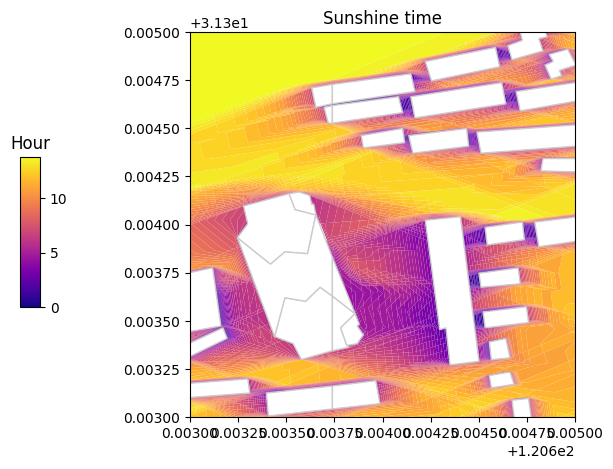

In [15]:

sunshine = pybdshadow.cal_sunshine(buildings_analysis,
                                   day='2022-07-15',
                                   roof=False,
                                   accuracy='vector',
                                   precision=900)

#Visualize buildings and sunshine time using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)
#define colorbar
cax = plt.axes([0.15, 0.33, 0.02, 0.3])
plt.title('Hour')
#plot the sunshine time
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)
#Buildings
buildings_analysis.plot(ax = ax,edgecolor='#ccc',facecolor=(1,1,1,1))
plt.sca(ax)
plt.title('Sunshine time')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()